<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula8a_mnist_Conv2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

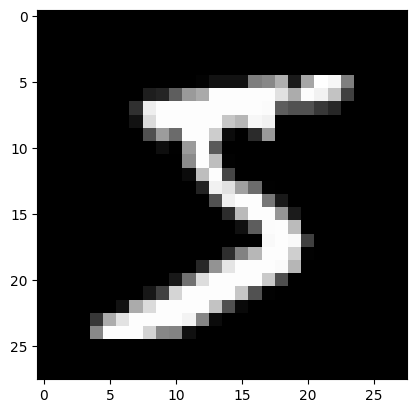

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap='gray')
plt.show()

In [5]:
train_labels[0]

5

In [6]:
test_images.shape

(10000, 28, 28)

In [8]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [13]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [10]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32") / 255

In [11]:
train_images.shape

(60000, 784)

In [14]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 3ms/step - loss: 0.2646 - accuracy: 0.9233
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1071 - accuracy: 0.9683
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0705 - accuracy: 0.9787
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0505 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0377 - accuracy: 0.9887


In [15]:
predicted = model.predict(test_images[0:1])
predicted[0]

1/1 [==============================] - 0s 182ms/step


array([3.7000529e-09, 2.5672866e-09, 1.8289564e-06, 6.1942287e-06,
       5.4570553e-11, 2.4889891e-08, 2.6590516e-13, 9.9999070e-01,
       2.2751289e-08, 1.3088761e-06], dtype=float32)

In [16]:
sum(predicted[0])

1.0000000877000388

In [17]:
predicted[0].argmax()

7

In [18]:
predicted[0][7]

0.9999907

In [19]:
test_labels[0]

7

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0756 - accuracy: 0.9781
test_acc: 0.9781000018119812


In [21]:
from tensorflow.keras.utils import to_categorical
train_labels_hot = to_categorical(train_labels)
test_labels_hot = to_categorical(test_labels)

In [22]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score
import numpy as np

class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size
  def fit(self, X, y):
    self.model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(y.shape[1], activation="softmax")
    ])
    self.model.compile(optimizer="rmsprop",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size)
    return self
  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    return np.array([(a == np.max(a)) for a in probabilities])

modelo = RedeNeural()
modelo.fit(train_images, train_labels_hot)
ypred = modelo.predict(test_images)
accuracy_score(test_labels_hot, ypred)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2666 - accuracy: 0.9235
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1091 - accuracy: 0.9680
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0712 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0517 - accuracy: 0.9847
Epoch 5/5
313/313 [==============================] - 0s 1ms/step


0.9777

In [24]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score
import numpy as np

class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size
  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids)
    self.model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(yhot.shape[1], activation="softmax")
    ])
    self.model.compile(optimizer="rmsprop",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, yhot, epochs=self.epochs, batch_size=self.batch_size)
    return self
  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    ypred = self.labels[np.argmax(probabilities, axis=1)]
    return ypred

modelo = RedeNeural()
modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2627 - accuracy: 0.9243
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1054 - accuracy: 0.9696
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0699 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0510 - accuracy: 0.9849
Epoch 5/5
313/313 [==============================] - 0s 1ms/step


0.9801

In [25]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [26]:
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

modelo = Pipeline([
    ("scaler", MinMaxScaler()),
    ("ann", RedeNeural())
])

modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.2643 - accuracy: 0.9246
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1067 - accuracy: 0.9685
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0696 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0507 - accuracy: 0.9844
Epoch 5/5
313/313 [==============================] - 0s 1ms/step


0.9792

In [28]:
from sklearn.base import BaseEstimator, TransformerMixin

class DividePor255(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return X.astype("float32") / 255

modelo = Pipeline([
    ("scaler", DividePor255()),
    ("ann", RedeNeural())
])

modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2683 - accuracy: 0.9222
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1099 - accuracy: 0.9683
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0724 - accuracy: 0.9786
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0511 - accuracy: 0.9847
Epoch 5/5
313/313 [==============================] - 1s 1ms/step


0.9803

In [29]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [31]:
class MudaShape(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return X.reshape((-1, 28 * 28))

modelo = Pipeline([
    ("scaler", DividePor255()),
    ("reshape", MudaShape()),
    ("ann", RedeNeural())
])

modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2609 - accuracy: 0.9244
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1077 - accuracy: 0.9679
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0710 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0511 - accuracy: 0.9845
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


0.9801

In [33]:
train_images.shape

(60000, 28, 28)

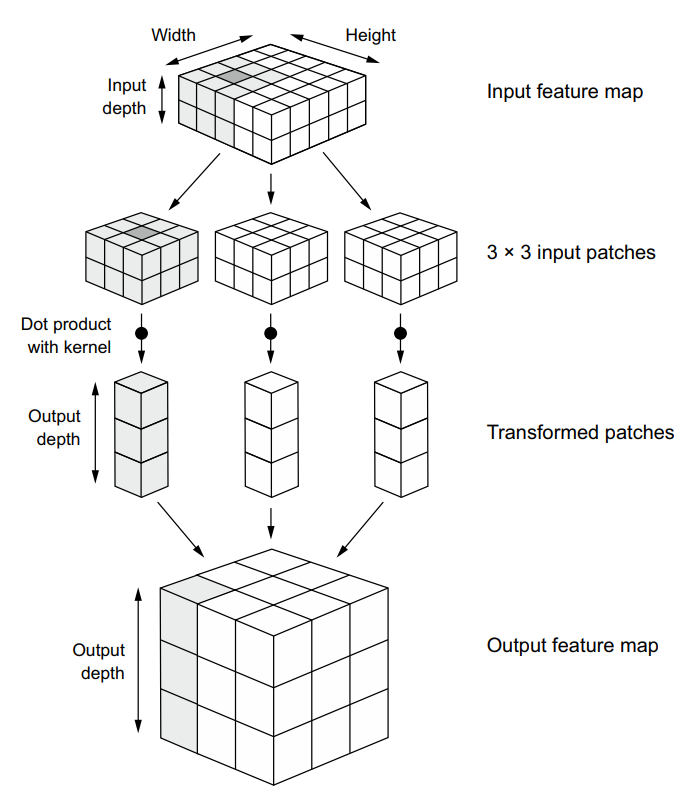

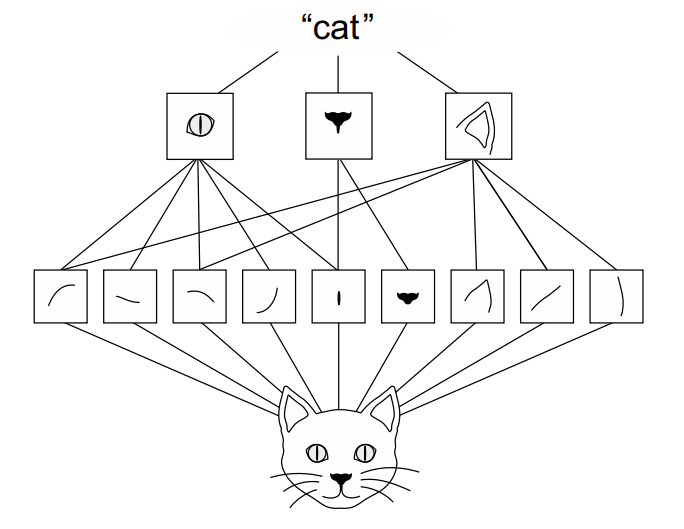

In [37]:
class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size
  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids)
    self.model = keras.Sequential([
        layers.Conv2D(4, 4, activation="relu"),
        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dense(yhot.shape[1], activation="softmax")
    ])
    self.model.compile(optimizer="rmsprop",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, yhot, epochs=self.epochs, batch_size=self.batch_size)
    return self
  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    ypred = self.labels[np.argmax(probabilities, axis=1)]
    return ypred

class MudaShape(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return X.reshape((-1, 28, 28, 1))

modelo = Pipeline([
    ("scaler", DividePor255()),
    ("reshape", MudaShape()),
    ("ann", RedeNeural())
])

modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 6s 4ms/step - loss: 0.2173 - accuracy: 0.9340
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0677 - accuracy: 0.9797
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0411 - accuracy: 0.9875
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0260 - accuracy: 0.9916
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


0.9833

In [39]:
def define_arquitetura(output_shape):
  model = keras.Sequential([
    layers.Conv2D(4, 4, activation="relu"),
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dense(output_shape, activation="softmax")
  ])
  return model

class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size
  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids)
    self.model = define_arquitetura(yhot.shape[1])
    self.model.compile(optimizer="rmsprop",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, yhot, epochs=self.epochs, batch_size=self.batch_size)
    return self
  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    ypred = self.labels[np.argmax(probabilities, axis=1)]
    return ypred

modelo = Pipeline([
    ("scaler", DividePor255()),
    ("reshape", MudaShape()),
    ("ann", RedeNeural())
])

modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 4s 5ms/step - loss: 0.2290 - accuracy: 0.9294
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0738 - accuracy: 0.9775
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0446 - accuracy: 0.9863
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0289 - accuracy: 0.9914
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


0.9838

In [41]:
def define_arquitetura(input_shape, output_shape):
  model = keras.Sequential([
    layers.Input(input_shape),
    layers.Dense(512, activation="relu"),
    layers.Dense(output_shape, activation="softmax")
  ])
  return model

class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size
  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids)
    self.model = define_arquitetura(X.shape[1], yhot.shape[1])
    self.model.compile(optimizer="rmsprop",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, yhot, epochs=self.epochs, batch_size=self.batch_size)
    return self
  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    ypred = self.labels[np.argmax(probabilities, axis=1)]
    return ypred

class MudaShape(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return X.reshape((-1, 28 * 28))

modelo = Pipeline([
    ("scaler", DividePor255()),
    ("reshape", MudaShape()),
    ("ann", RedeNeural())
])

modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2639 - accuracy: 0.9241
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1063 - accuracy: 0.9681
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0704 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0502 - accuracy: 0.9851
Epoch 5/5
313/313 [==============================] - 1s 1ms/step


0.9807

In [43]:
def define_arquitetura(input_shape, output_shape):
  inputs = keras.Input(shape=input_shape)
  x = layers.Dense(512, activation="relu")(inputs)
  outputs = layers.Dense(output_shape, activation="softmax")(x)
  return keras.Model(inputs=inputs, outputs=outputs)

class MudaShape(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return X.reshape((-1, 28 * 28))

modelo = Pipeline([
    ("scaler", DividePor255()),
    ("reshape", MudaShape()),
    ("ann", RedeNeural())
])

modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2642 - accuracy: 0.9245
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1073 - accuracy: 0.9683
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0714 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0514 - accuracy: 0.9848
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


0.9804

In [53]:
def define_arquitetura(input_shape, output_shape):
  inputs = keras.Input(shape=input_shape)
  x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
  x = layers.Flatten()(x)
  outputs = layers.Dense(output_shape, activation="softmax")(x)
  return keras.Model(inputs=inputs, outputs=outputs)

model = define_arquitetura((28,28,1), 10)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 3, 3, 128)         7385

In [57]:
class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size
  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids)
    self.model = define_arquitetura(X.shape[1:], yhot.shape[1])
    self.model.compile(optimizer="rmsprop",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, yhot, epochs=self.epochs, batch_size=self.batch_size)
    return self
  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    ypred = self.labels[np.argmax(probabilities, axis=1)]
    return ypred

In [58]:
class MudaShape(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return X.reshape((-1, 28, 28, 1))

In [59]:
modelo = Pipeline([
    ("scaler", DividePor255()),
    ("reshape", MudaShape()),
    ("ann", RedeNeural())
])

modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 4s 5ms/step - loss: 0.2151 - accuracy: 0.9353
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0522 - accuracy: 0.9840
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0352 - accuracy: 0.9893
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0265 - accuracy: 0.9915
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


0.992